**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5044 - Operaciones de aprendizaje automático (MLOps)**

**Tecnológico de Monterrey**

Dr. Gerardo Rodríguez Hernández

Prof. José Ángel Martínez Navarro

**Semana 5**
Fase 1 | Avance de Proyecto

**Equipo 18**
- Ali Mateo Campos Martínez      A01796071
- Mario Fonseca Martínez         A01795228
- Miguel Ángel Hernández Núñez   A01795751
- Jonatan Israel Meza Mendoza    A01275322
- Eder Mauricio Castillo Galindo A01795453

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Cargar dataset modificado
df = pd.read_csv("../content/drive/MyDrive/OPS con ML/turkish_music_emotion_modified.csv")

# Revisar primeras filas
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,mixed_type_col
0,relax,0.052,NaN,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.97,979
1,relax,0.125,0.439,6.680,142.24,4.058,0.516,0.785,0.397,0.556,...,1.000,0,0.984,0.285,0.211,-0.082,3.364,0.702,0.967,943
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.746,0.016,1,0.413,28.106,0.134,1.682,0.692,0.963,628
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,1.000,0.161,0.757,error,0.265,0.042,0.354,0.743,0.968,192
4,relax,0.066,0.591,9.769,88.89,3.217,0.228,0.814,0.096,0.434,...,0.404,1,0.001,0.345,0.261,0.089,0.748,0.674,0.957,292


In [ ]:
# Con el ánimo de comparar luego
# df_original = pd.read_csv("../data/raw/turkis_music_emotion_original.csv")

# **Parte 1**. Análisis descriptivo (univariante)

In [ ]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 401 non-null    object 
 2   _Lowenergy_Mean                                 404 non-null    float64
 3   _Fluctuation_Mean                               405 non-null    float64
 4   _Tempo_Mean                                     401 non-null    object 
 5   _MFCC_Mean_1                                    402 non-null    float64
 6   _MFCC_Mean_2                                    403 non-null    float64
 7   _MFCC_Mean_3                                    397 non-null    object 
 8   _MFCC_Mean_4                                    402 non-null    object 
 9   _MFCC_Mean_5                               

In [ ]:
# Contar cuántas son object (texto/categorías)
num_object = df.select_dtypes(include="object")

# Contar cuántas son numéricas
num_numeric = df.select_dtypes(include="number")

print(f"Columnas tipo object: {num_object.shape[1]}")
print(f"Columnas numéricas: {num_numeric.shape[1]}")

Columnas tipo object: 38
Columnas numéricas: 14


In [ ]:
# Porcentaje (%) de valores faltantes por columna
df.isna().sum().mul(100).div(len(df)).sort_values(ascending=False)

,0
mixed_type_col,9.313725
_MFCC_Mean_11,2.696078
_MFCC_Mean_3,2.696078
_MFCC_Mean_5,1.960784
_Spectralcentroid_Mean,1.960784
_HarmonicChangeDetectionFunction_Mean,1.960784
_MFCC_Mean_12,1.960784
_Tempo_Mean,1.715686
_Pulseclarity_Mean,1.715686
_RMSenergy_Mean,1.715686


## Análisis de variables numéricas

In [ ]:
# Estadística descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_Lowenergy_Mean,404.0,4.241829,50.714118,0.302,0.52300,0.5535,0.58500,805.528
_Fluctuation_Mean,405.0,9.711723,32.204572,3.987,5.85200,6.7450,7.83800,483.105
_MFCC_Mean_1,402.0,6.270055,37.120651,0.423,1.95875,2.4200,2.90000,565.490
_MFCC_Mean_2,403.0,7.599908,77.807229,-43.608,-0.26700,0.0650,0.41350,946.483
_MFCC_Mean_13,406.0,1.004042,19.712898,-0.620,-0.04400,0.0390,0.10500,397.220
_AttackTime_Slope,402.0,4.055219,49.192974,-0.465,-0.09300,0.0100,0.08975,732.036
_Eventdensity_Mean,405.0,8.865998,67.375263,0.234,1.73700,2.7730,3.74200,998.241
_Pulseclarity_Mean,401.0,4.355584,49.896492,0.011,0.13000,0.2180,0.33100,794.363
_Spectralcentroid_Mean,400.0,4625.624853,21765.211883,606.524,1983.39500,2547.6780,3179.98675,318051.072
_Chromagram_Mean_3,405.0,2.682472,45.699208,0.000,0.08300,0.2990,0.59500,920.000


In [ ]:
# Forma (asimetría)
df.skew(numeric_only=True).sort_values(ascending=False)
# Todas las variables numéricas tienen sesgo positivo, es decir su promedio es mayor que la moda.

,0
_MFCC_Mean_13,20.147970
_Chromagram_Mean_3,20.118656
_Chromagram_Mean_10,20.045608
_Lowenergy_Mean,14.444717
_Chromagram_Mean_9,14.111677
_Pulseclarity_Mean,13.526342
_Fluctuation_Mean,13.223509
_AttackTime_Slope,12.887338
_Eventdensity_Mean,12.461290
_MFCC_Mean_1,12.268594


In [ ]:
# Forma (curtosis)
df.kurt(numeric_only=True).sort_values(ascending=False)

,0
_MFCC_Mean_13,405.960372
_Chromagram_Mean_3,404.839071
_Chromagram_Mean_10,402.209418
_Lowenergy_Mean,211.045891
_Chromagram_Mean_9,198.469578
_Pulseclarity_Mean,192.842101
_Fluctuation_Mean,180.148383
_AttackTime_Slope,171.826077
_Eventdensity_Mean,164.068311
_MFCC_Mean_1,163.872334


In [ ]:
def plot_numeric_eda(df: pd.DataFrame, bins: int = 20) -> None:
    """
    Genera histogramas y boxplots para todas las columnas numéricas del DataFrame.
    - Detecta automáticamente las columnas numéricas.
    - Muestra en pantalla ambas visualizaciones.

    Parámetros:
        df (pd.DataFrame): DataFrame a analizar
        bins (int): número de intervalos para los histogramas
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

    if not numeric_cols:
        print("No se encontraron columnas numéricas en el DataFrame!")
        return

    #print(f"Columnas numéricas detectadas ({len(numeric_cols)}): {numeric_cols}\n")

    # --- Histogramas ---
    print("Distribución de variables numéricas (Histogramas)")
    df[numeric_cols].hist(
        figsize=(15, 10),
        bins=bins,
        color="skyblue",
        edgecolor="black"
    )
    plt.suptitle("Distribución de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- Boxplots ---
    print("\nDispersión y posibles outliers (Boxplots)")
    df[numeric_cols].plot(
        kind="box",
        subplots=True,
        layout=(max(1, len(numeric_cols) // 3 + 1), 3),
        figsize=(15, 16),
        sharex=False,
        sharey=False,
        vert=False,
        color=dict(boxes="blue", whiskers="black", medians="red", caps="gray")
    )
    plt.suptitle("Boxplots de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Distribución de variables numéricas (Histogramas)


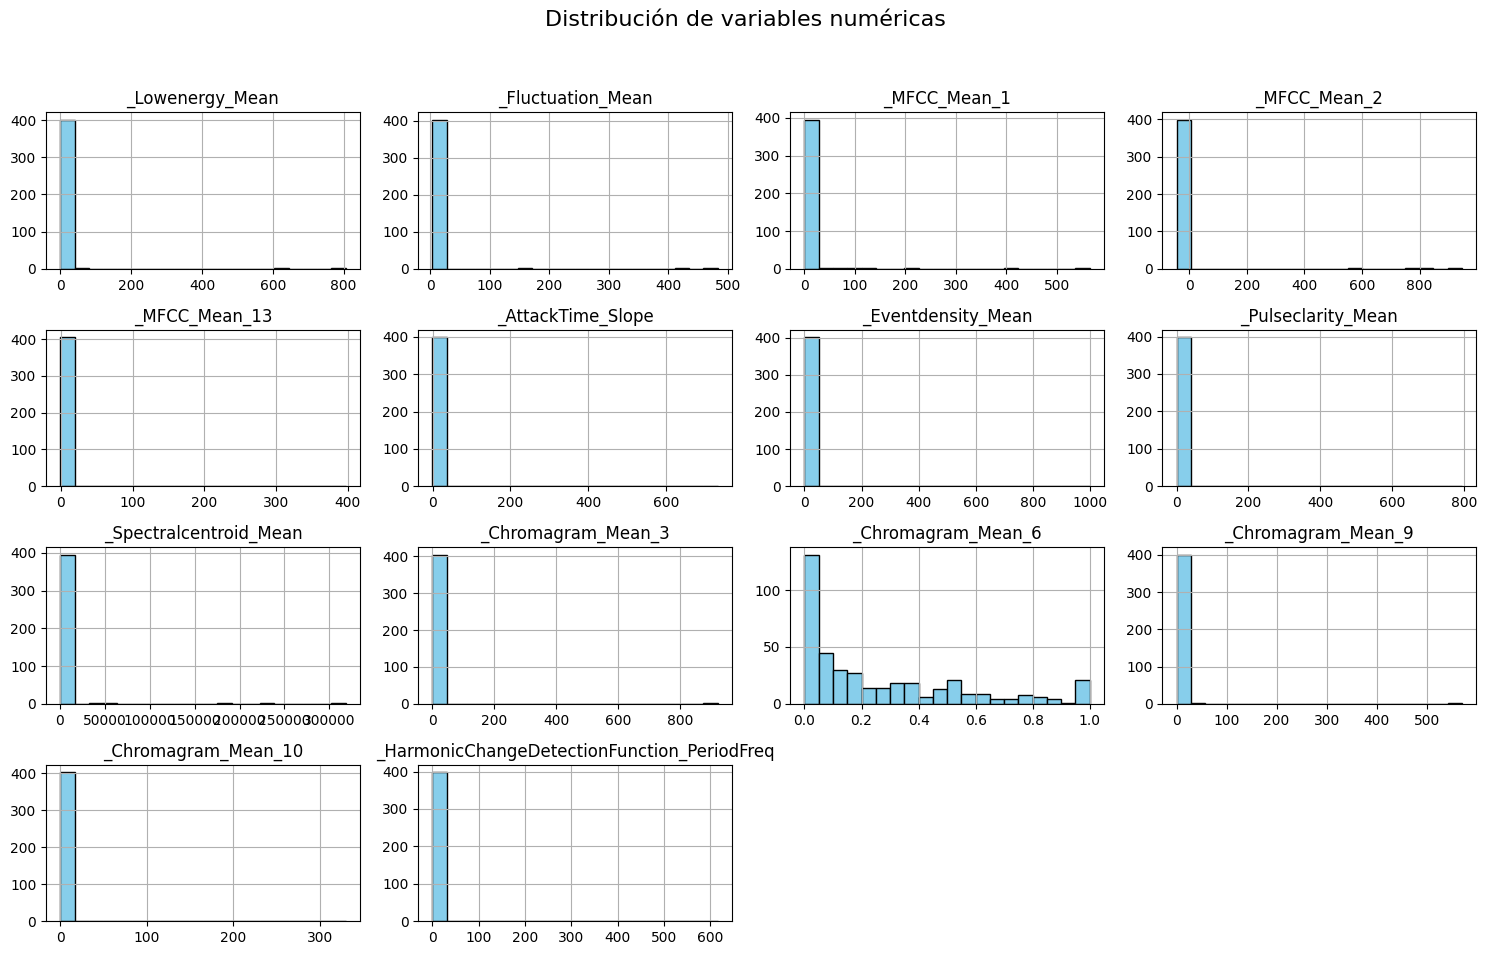


Dispersión y posibles outliers (Boxplots)


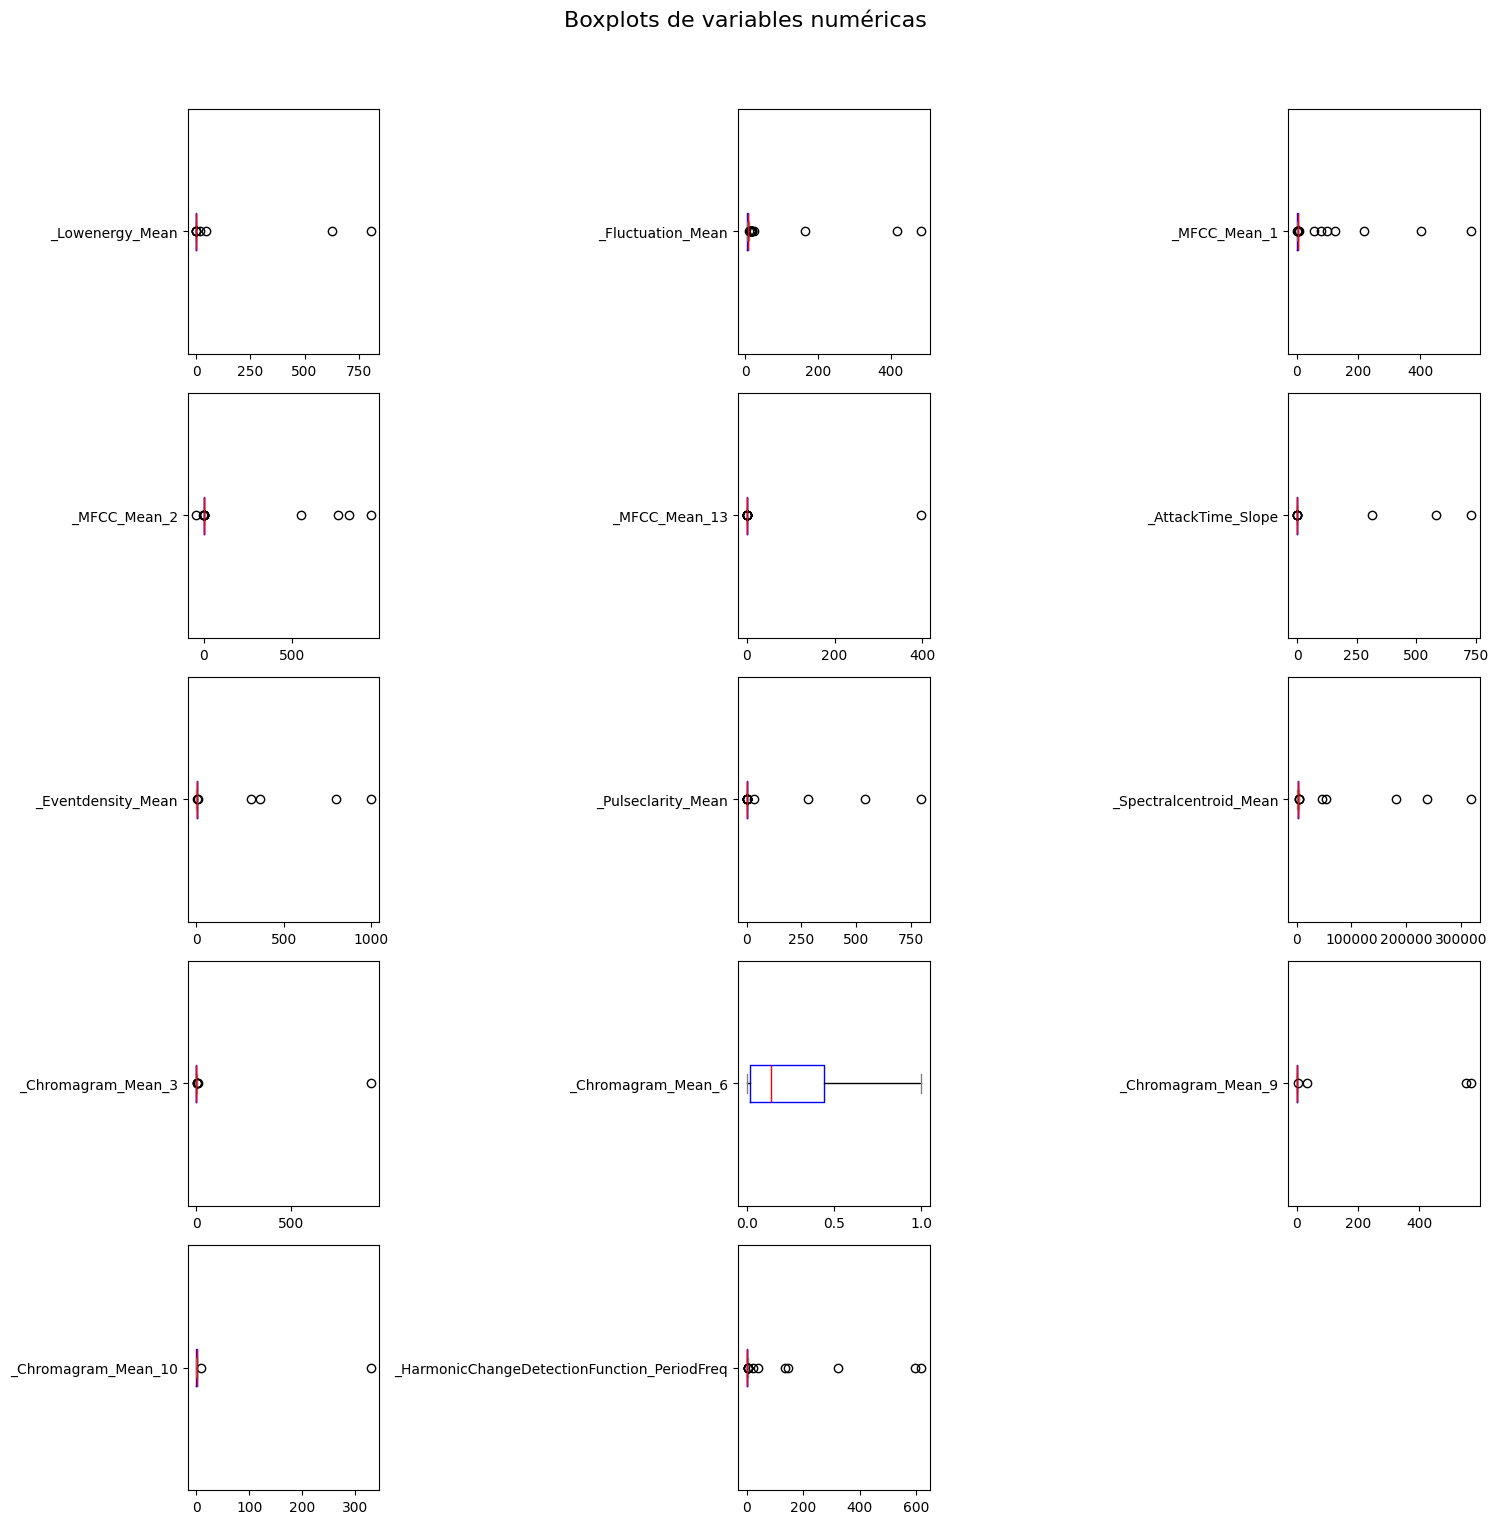

In [ ]:
# Gráficas
plot_numeric_eda(df)

- Los histogramas anteriores sugieren que existen varios valores atípicos en diferentes columnas.

## Análisis de variables categóricas

In [ ]:
# Descripción estadística
df.describe(include='O').T

,count,unique,top,freq
Class,403,8,relax,100
_RMSenergy_Mean,401,201,0.06,6
_Tempo_Mean,401,381,150.255,3
_MFCC_Mean_3,397,314,0.259,5
_MFCC_Mean_4,402,316,0.123,5
_MFCC_Mean_5,400,296,0.144,4
_MFCC_Mean_6,404,297,0.138,5
_MFCC_Mean_7,405,304,0.073,5
_MFCC_Mean_8,405,272,-0.005,6
_MFCC_Mean_9,405,276,-0.018,5


- No sólo el nombre de las columnas sino adicionalmente la moda de la tabla anterior sugiere que son realmente valores numéricos. mixed_type_col y Class son las únicas que sugieren ser tipo string. A continuación revisamos el detalle:

In [ ]:
# Recuentos únicos (número de ocurrencias para cada valor único)
cat_cols = ["Class", "mixed_type_col"]

for col in cat_cols:
    #print("\nNúmero de ocurrencias para cada valor:")
    print(df[col].value_counts(dropna=False))
    print("\n")

Class
relax      100
sad         99
happy       98
angry       93
NaN          5
 ANGRY       4
 HAPPY       4
 SAD         3
 RELAX       2
Name: count, dtype: int64


mixed_type_col
bad        42
unknown    39
NaN        38
987         3
488         2
           ..
376         1
206         1
373         1
448         1
687         1
Name: count, Length: 258, dtype: int64




In [ ]:
def plot_counts(df: pd.DataFrame, col: str, ascending: bool = False, horizontal: bool = False) -> None:
    """
    Grafica el conteo de valores únicos en una columna categórica.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        col (str): Nombre de la columna a graficar.
        ascending (bool): Si True, ordena por frecuencia ascendente.
        horizontal (bool): Si True, muestra el gráfico de barras horizontal.
    """
    # Contar valores
    counts = df[col].value_counts(ascending=ascending, dropna=False)

    # Crear figura
    fig, ax = plt.subplots(figsize=(8, 5))

    if horizontal:
        counts.plot(kind="barh", color="skyblue", edgecolor="black", ax=ax)
        ax.set_xlabel("Conteo")
        ax.set_ylabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, (value, count) in enumerate(counts.items()):
            ax.text(count + 0.5, i, str(count), va="center", fontsize=10)
    else:
        counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
        ax.set_ylabel("Conteo")
        ax.set_xlabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, count in enumerate(counts):
            ax.text(i, count + 0.5, str(count), ha="center", va="bottom", fontsize=10)

    plt.tight_layout()
    plt.show()

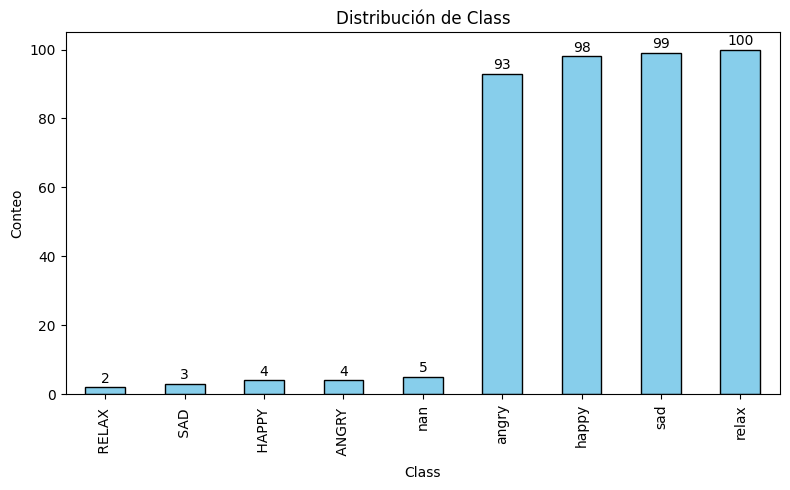

In [ ]:
plot_counts(df, "Class", ascending=True)

* "mixed_type_col" también parece ser un numérica, sólo que se requiere cambiar "bad" y "unknown" por nulos inicialmente.
* La columna "Class" sólo requiere remover espacios al inicio y final de cada cadena y luego estandarizar así:
    * relax = RELAX
    * sad = SAD
    * happy = HAPPY
    * angry = ANGRY
* La columna "Class" y "mixed_type_col" también tiene valores faltantes.
* De esa manera la única categórica sería nuestra variable a predecir "Class". Por lo tanto creamos una función para convertirlas a numéricas las que faltan:

In [ ]:
def clean_object_columns_to_numeric(
    df: pd.DataFrame,
    target_col: str = "Class"
) -> tuple[pd.DataFrame, dict]:
    """
    Limpia columnas tipo object en un DataFrame:
    - Quita espacios al inicio y final.
    - Elimina espacios internos.
    - Reemplaza comas por puntos (ej: "0,56" -> "0.56").
    - Convierte a numérico con errors='coerce' (valores no numéricos -> NaN).
    - Excluye la columna objetivo (por defecto 'Class').
    - Genera un reporte con los valores no convertibles por columna.

    Retorna:
        df_clean: DataFrame limpio.
        non_numeric_report: dict {columna: [valores no convertibles]}
    """
    df_clean = df.copy()
    non_numeric_report = {}

    for col in df_clean.select_dtypes(include="object").columns:
        if col == target_col:
            continue  # excluir la variable objetivo

        # Guardar versión original para comparación
        original_values = df_clean[col].copy()

        # Limpieza general
        df_clean[col] = (
            df_clean[col]
            .astype(str)
            .str.strip()           # eliminar espacios extremos
            .str.replace(" ", "", regex=False)  # eliminar espacios internos
            .str.replace(",", ".", regex=False)  # cambiar coma por punto
        )

        # Convertir a número
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

        # Detectar valores que se volvieron NaN
        mask_nan = df_clean[col].isna()
        invalid_values = original_values[mask_nan].dropna().unique()

        if len(invalid_values) > 0:
            non_numeric_report[col] = invalid_values.tolist()

    return df_clean, non_numeric_report

In [ ]:
df_clean, report = clean_object_columns_to_numeric(df, target_col="Class")

In [ ]:
print("\n Reporte de valores no convertibles:\n")
for col, vals in report.items():
    print(f" - {col}: {vals}")


 Reporte de valores no convertibles:

 - _RMSenergy_Mean: ['error']
 - _Tempo_Mean: ['error', 'invalid']
 - _MFCC_Mean_3: ['?']
 - _MFCC_Mean_4: ['invalid', 'error']
 - _MFCC_Mean_5: ['invalid']
 - _MFCC_Mean_6: ['?']
 - _MFCC_Mean_7: ['error']
 - _MFCC_Mean_8: ['invalid']
 - _MFCC_Mean_9: ['?']
 - _MFCC_Mean_10: ['error']
 - _MFCC_Mean_11: [' NAN ']
 - _MFCC_Mean_12: ['?', 'error']
 - _Roughness_Mean: ['invalid']
 - _Roughness_Slope: ['error']
 - _Zero-crossingrate_Mean: ['error']
 - _AttackTime_Mean: ['?']
 - _Rolloff_Mean: [' ERROR ', ' NAN ', ' INVALID ']
 - _Brightness_Mean: ['invalid', '?']
 - _Spectralspread_Mean: ['error']
 - _Spectralskewness_Mean: ['error', 'invalid', '?']
 - _Spectralkurtosis_Mean: ['invalid', 'error']
 - _Spectralflatness_Mean: ['invalid', 'error']
 - _EntropyofSpectrum_Mean: ['invalid', '?']
 - _Chromagram_Mean_1: ['invalid', ' NAN ']
 - _Chromagram_Mean_2: ['error']
 - _Chromagram_Mean_4: ['?']
 - _Chromagram_Mean_5: ['error', '?']
 - _Chromagram_Mean_7:

- Teniendo en cuenta los resultados anteriores sobre la columna objetivo, es evidente que se tienen solamente 4 clases, por lo que procedemos a realizar una función para procesar la variable objetivo:

In [ ]:
def normalize_target_column(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Normaliza la columna de clases:
    - Convierte a string
    - Strip: elimina espacios al inicio y al final
    - Convierte a minúsculas
    - Reemplaza valores no válidos por NaN
    """
    df_clean = df.copy()

    df_clean[col] = (
        df_clean[col]
        .astype(str)             # asegurar string
        .str.strip()             # quitar espacios extremos
        .str.lower()             # pasar a minúsculas
    )

    # Reemplazar valores "nan" de texto (que aparecen al convertir) por np.nan
    df_clean[col] = df_clean[col].replace("nan", pd.NA)

    # Mantener solo las clases válidas
    valid_classes = {"happy", "sad", "angry", "relax"}
    df_clean.loc[~df_clean[col].isin(valid_classes), col] = pd.NA

    return df_clean

In [ ]:
df_clean = normalize_target_column(df_clean, "Class")

In [ ]:
print(f"Después de eliminar nulos, quedan {len(df_clean)} filas.")
print(df_clean['Class'].value_counts(dropna=False))

Después de eliminar nulos, quedan 408 filas.
Class
relax    102
happy    102
sad      102
angry     97
<NA>       5
Name: count, dtype: int64


In [ ]:
df_clean = df_clean.dropna(subset=['Class'])

In [ ]:
df_clean["Class"].value_counts(dropna=False)

,count
Class,
relax,102
happy,102
sad,102
angry,97


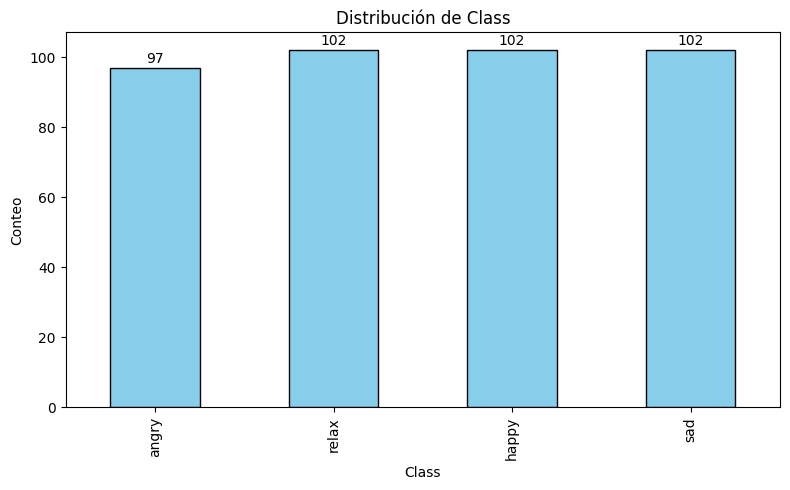

In [ ]:
plot_counts(df_clean, "Class", ascending=True)

In [ ]:
df_clean.describe(include='O').T

,count,unique,top,freq
Class,403,4,relax,102


In [ ]:
df_clean.isna().sum().mul(100).div(len(df)).sort_values(ascending=False)

,0
mixed_type_col,28.431373
_MFCC_Mean_11,2.941176
_MFCC_Mean_3,2.941176
_MFCC_Mean_12,2.696078
_RMSenergy_Mean,2.450980
_MFCC_Mean_5,2.205882
_Spectralskewness_Mean,2.205882
_Tempo_Mean,2.205882
_HarmonicChangeDetectionFunction_Mean,2.205882
_Spectralcentroid_Mean,1.960784


- En la práctica de feature engineering, 25% se usa como umbral operativo para eliminar una columna con esa cantidad de faltantes.
- Necesario revisar importancia de la columna "mixed_type_col" antes de eliminarla, pues tiene casi el 30% de faltantes.
- Evaluar su correlación con el target (Class). Si no aporta información predictiva significativa, entonces se puede eliminar. NOTA: POR AHORA SE ELIMINA.

Algunas referencias:

- “When more than 20–30% of data in a variable are missing, imputation becomes unreliable, and analysts should consider excluding that variable unless the missingness mechanism is well understood.” (Little, R. J. A., & Rubin, D. B. (2002). Statistical Analysis with Missing Data. Wiley.)
- “High rates of missingness (above 40%) often yield unstable imputations, and dropping the variable may be preferable unless domain knowledge dictates otherwise.” (Van Buuren, S. (2018). Flexible Imputation of Missing Data. CRC Press.)
- “Variables with more than 25% missing values are often removed unless they have strong theoretical justification.” (Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.)

In [ ]:
df_clean.describe(include='O').T

,count,unique,top,freq
Class,401,4,relax,102


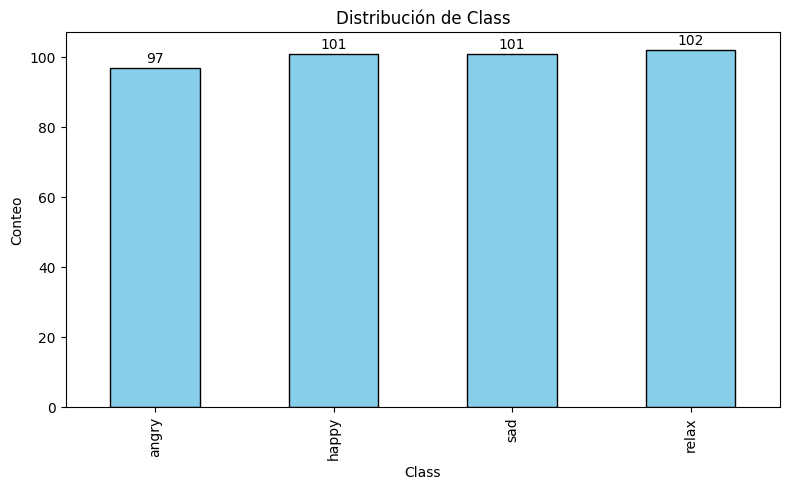

In [ ]:
plot_counts(df_clean, "Class", ascending=True)

In [ ]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,401.0,3.302980,47.640649,0.010,0.086,0.1290,0.176,873.096
_Lowenergy_Mean,401.0,4.269434,50.902930,0.302,0.523,0.5540,0.584,805.528
_Fluctuation_Mean,401.0,9.758800,32.361615,3.987,5.879,6.7540,7.838,483.105
_Tempo_Mean,401.0,153.090383,602.915035,48.284,101.964,119.1165,146.351,12177.714
_MFCC_Mean_1,401.0,6.282127,37.166221,0.423,1.961,2.4230,2.902,565.490
_MFCC_Mean_2,401.0,7.636069,77.999803,-43.608,-0.265,0.0595,0.407,946.483
_MFCC_Mean_3,401.0,8.923601,74.565302,-0.870,0.300,0.4820,0.686,721.726
_MFCC_Mean_4,401.0,2.498439,49.691388,-11.560,-0.116,0.0490,0.198,994.982
_MFCC_Mean_5,401.0,5.655153,54.722381,-0.494,0.063,0.1885,0.296,683.085
_MFCC_Mean_6,401.0,0.037278,0.205608,-0.916,-0.078,0.0495,0.153,0.799


In [ ]:
df_no_outliers = replace_outliers_iqr(df_clean)

- '_RMSenergy_Mean': 6 outliers reemplazados por NaN
- '_Lowenergy_Mean': 10 outliers reemplazados por NaN
- '_Fluctuation_Mean': 16 outliers reemplazados por NaN
- '_Tempo_Mean': 1 outliers reemplazados por NaN
- '_MFCC_Mean_1': 21 outliers reemplazados por NaN
- '_MFCC_Mean_2': 12 outliers reemplazados por NaN
- '_MFCC_Mean_3': 11 outliers reemplazados por NaN
- '_MFCC_Mean_4': 15 outliers reemplazados por NaN
- '_MFCC_Mean_5': 13 outliers reemplazados por NaN
- '_MFCC_Mean_6': 16 outliers reemplazados por NaN
- '_MFCC_Mean_7': 12 outliers reemplazados por NaN
- '_MFCC_Mean_8': 15 outliers reemplazados por NaN
- '_MFCC_Mean_9': 13 outliers reemplazados por NaN
- '_MFCC_Mean_10': 13 outliers reemplazados por NaN
- '_MFCC_Mean_11': 18 outliers reemplazados por NaN
- '_MFCC_Mean_12': 15 outliers reemplazados por NaN
- '_MFCC_Mean_13': 15 outliers reemplazados por NaN
- '_Roughness_Mean': 21 outliers reemplazados por NaN
- '_Roughness_Slope': 14 outliers reemplazados por NaN
- '_Zero-cro

In [ ]:
from sklearn.impute import SimpleImputer

# Seleccionamos columnas numéricas
columnas_numericas = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# Imputador con estrategia de media
imputador_media = SimpleImputer(strategy='mean')

# Aplicamos imputación
df_no_outliers[columnas_numericas] = imputador_media.fit_transform(df_no_outliers[columnas_numericas])

In [ ]:
print(df_no_outliers.isna().sum())  # Debe mostrar ceros en columnas numéricas

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

In [ ]:
# Supongamos que df_clean ya contiene tus datos limpios
plot_numeric_eda(df_no_outliers, bins=20)

Distribución de variables numéricas (Histogramas)


In [ ]:
df_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,385.0,0.134429,0.063053,0.010,0.08400,0.1280,0.17400,0.309
_Lowenergy_Mean,389.0,0.553987,0.047172,0.431,0.52300,0.5530,0.58300,0.676
_Fluctuation_Mean,382.0,6.835495,1.392888,3.987,5.83125,6.7025,7.69775,10.578
_Tempo_Mean,391.0,123.118877,33.946525,48.284,101.48750,119.0440,147.17850,195.026
_MFCC_Mean_1,375.0,2.387811,0.661773,0.634,1.93350,2.3440,2.83250,4.165
_MFCC_Mean_2,384.0,0.071190,0.469044,-1.088,-0.26275,0.0590,0.39925,1.411
_MFCC_Mean_3,378.0,0.485508,0.275414,-0.218,0.27975,0.4760,0.65500,1.248
_MFCC_Mean_4,379.0,0.048718,0.233401,-0.550,-0.11300,0.0580,0.20300,0.675
_MFCC_Mean_5,380.0,0.179632,0.177266,-0.290,0.06275,0.1820,0.28725,0.607
_MFCC_Mean_6,380.0,0.041926,0.164253,-0.411,-0.06925,0.0505,0.15125,0.491


In [ ]:
# Forma (asimetría)
df_no_outliers.skew(numeric_only=True).sort_values(ascending=False)

,0
_Chromagram_Mean_7,1.279643
_Chromagram_Mean_4,1.251363
_Chromagram_Mean_2,1.183890
_Chromagram_Mean_6,1.120315
_Spectralkurtosis_Mean,1.059390
_Roughness_Mean,1.049060
_Pulseclarity_Mean,0.812769
_Chromagram_Mean_5,0.782739
_Chromagram_Mean_9,0.728444
_Chromagram_Mean_11,0.720198


- Las 5 primeras presentan cola derecha larga, incluso después de eliminar outliers, lo que sugiere distribuciones sesgadas hacia valores bajos y pocos valores altos.
- Considerar transformaciones logarítmicas o Box–Cox teniendo en cuenta que tienen valores positivos. Esto estabiliza la varianza y reduce la asimetría.

In [ ]:
# Forma (curtosis)
df_no_outliers.kurt(numeric_only=True).sort_values(ascending=False)

,0
_Chromagram_Mean_7,0.940733
_Spectralkurtosis_Mean,0.662288
_Chromagram_Mean_4,0.645971
_Chromagram_Mean_2,0.427573
_AttackTime_Mean,0.378900
_Roughness_Mean,0.352119
_Chromagram_Mean_6,0.211399
_MFCC_Mean_10,-0.001125
_Spectralskewness_Mean,-0.027575
_Lowenergy_Mean,-0.027946


- Casi todas las variables están entre -0.4 y +0.9, lo cual indica distribuciones relativamente planas o normales. Muy pocas con curtosis positiva significativa (_Chromagram_Mean_7 = 0.95, _Spectralkurtosis_Mean = 0.79).
- Esto confirma que la eliminación de outliers fue efectiva, ya que las colas extremas (que elevan la curtosis) se redujeron.

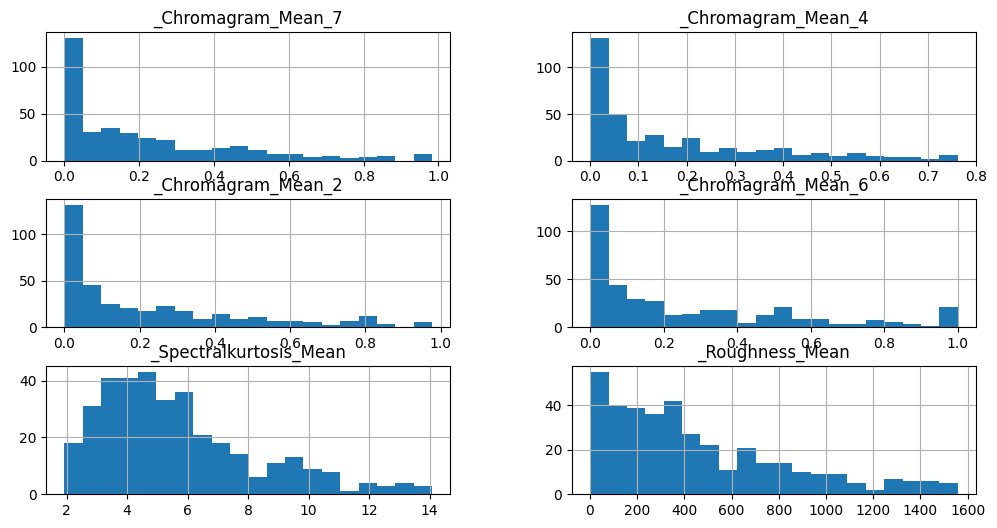

In [ ]:
cols_skewed = df_no_outliers.skew(numeric_only=True).sort_values(ascending=False).head(6).index
df_no_outliers[cols_skewed].hist(figsize=(12,6), bins=20)
plt.show()

Se toman en cuenta las 6 columnas con mayores valores de curtosis para realizar transformación y obtener una mejor simetria en los datos

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Instanciar el transformador
pt = PowerTransformer(method='yeo-johnson')

# Aplicar transformación
df_transformed = df_no_outliers.copy()
df_transformed[cols_skewed] = pt.fit_transform(df_no_outliers[cols_skewed])

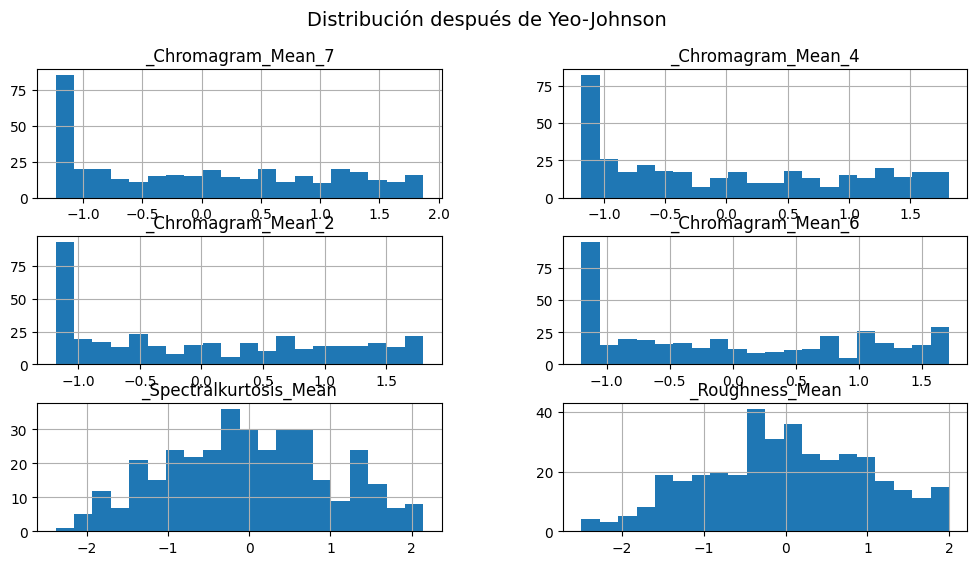

In [ ]:
df_transformed[cols_skewed].hist(figsize=(12,6), bins=20)
plt.suptitle("Distribución después de Yeo-Johnson", fontsize=14)
plt.show()

In [ ]:
df_skew_before = df_no_outliers[cols_skewed].skew()
# Convert the transformed NumPy array back to a pandas DataFrame before calculating skew
df_skew_after = pd.DataFrame(pt.transform(df_no_outliers[cols_skewed]), columns=cols_skewed).skew()

# Tabla comparativa
pd.DataFrame({
    'Skew Original': df_skew_before.round(2),
    'Skew Transformado': df_skew_after.round(2)
}).sort_values(by='Skew Original', ascending=False)

,Skew Original,Skew Transformado
_Chromagram_Mean_7,1.28,0.27
_Chromagram_Mean_4,1.25,0.33
_Chromagram_Mean_2,1.18,0.29
_Chromagram_Mean_6,1.12,0.28
_Spectralkurtosis_Mean,1.06,0.03
_Roughness_Mean,1.05,-0.08


Se obtuvo una mejora considerable en la distribución de los datos. Se consideró la aplicación de transformación Yeo-Johnson ya que funciona con valores de curtosis negativos y ceros obteniendo como beneficio una mejora en la estabilidad de los modelos a implementar.

In [87]:

le = LabelEncoder()
df_no_outliers['Class_encoded'] = le.fit_transform(df_no_outliers['Class'])

# Ver el mapeo
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'angry': np.int64(0), 'happy': np.int64(1), 'relax': np.int64(2), 'sad': np.int64(3)}


In [88]:
{'angry': 0, 'happy': 1, 'relax': 2, 'sad': 3}

{'angry': 0, 'happy': 1, 'relax': 2, 'sad': 3}

Se definen variables predictoras y variable objetivo

In [90]:
# Division del conjunto de datos

X = df_no_outliers.drop(['Class', 'Class_encoded'], axis=1)
y = df_no_outliers['Class_encoded']

print(X.shape)
print(y.value_counts())

(403, 51)
Class_encoded
2    102
1    102
3    102
0     97
Name: count, dtype: int64


Se definen conjuntos de entrenamiento, validación y prueba

- Entrenamiento (60%): para ajustar el modelo.
- Validación (20%): para afinar hiperparámetros y evitar sobreajuste.
- Prueba (20%): para evaluar el rendimiento final del modelo en datos no vistos.


In [91]:
# Separar conjuntos de entrenamiento, validacion  y prueba
from sklearn.model_selection import train_test_split
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=.25, shuffle=True, random_state=1)

print('Tamaño del conjunto de entrenamiento:', X_train.shape)
print('Tamaño del conjunto de validación:', X_val.shape)
print('Tamaño del conjunto de prueba', X_test.shape)

Tamaño del conjunto de entrenamiento: (241, 51)
Tamaño del conjunto de validación: (81, 51)
Tamaño del conjunto de prueba (81, 51)


Generemos nuestro primer modelo con un árbol de decisión, que identificamos como DT por decision tree:

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

modeloDT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=1)   # Incializamos el modelo con los hiperparámetros predeterminados.
clf = modeloDT.fit(X_train, y_train)   # Entrenamos con el conjunto de prueba para obtener nuestro primer clasificador (clf)

# Podemos observar el desempeño en el conjunto de entrenamieto para verificar
# el subentrenamiento o sobreentrenamiento, pero no para evaluar el modelo en sí:
print('Exactitud en el conjunto de entrenamiento: %.2f' % clf.score(X_train, y_train))

# Así, el conjunto con el que nos interesa evaluar el desempeño es con los de validación,
# así que calculamos primero sus predicciones y después las usamos para evaluar el modelo:

predi = clf.predict(X_val)     # Obtenemos predicciones de 0s, 1s o 2s para cada clase

print('Exactitud en el conjunto de validación: %.2f' % clf.score(X_val, y_val))
print('Exactitud en el conjunto de prueba: %.2f' % clf.score(X_test, y_test))

Exactitud en el conjunto de entrenamiento: 0.79
Exactitud en el conjunto de validación: 0.68
Exactitud en el conjunto de prueba: 0.63


In [93]:
modeloRF = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
clf_rf = modeloRF.fit(X_train, y_train)
print('RF - Validación: %.2f' % clf_rf.score(X_val, y_val))
print('RF - Prueba: %.2f' % clf_rf.score(X_test, y_test))

RF - Validación: 0.84
RF - Prueba: 0.80


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definimos el modelo base
modeloRF = RandomForestClassifier(random_state=1)

# Definimos el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Configuramos la búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=modeloRF,
    param_grid=param_grid,
    cv=5,                      # Número de folds
    scoring='accuracy',        # Métrica de evaluación
    n_jobs=-1,                 # Usa todos los núcleos disponibles
    verbose=2                  # Muestra progreso
)

# Ejecutamos la búsqueda
grid_search.fit(X_train, y_train)

# Mostramos los mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor exactitud en validación:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mejor exactitud en validación: 0.7801020408163265


In [95]:
mejor_modelo = grid_search.best_estimator_
mejor_modelo.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_split=5,
                       n_estimators=300, random_state=1)

In [96]:
from sklearn.metrics import classification_report
y_pred = mejor_modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.79      0.83      0.81        18
           2       0.70      0.84      0.76        19
           3       0.75      0.60      0.67        25

    accuracy                           0.78        81
   macro avg       0.78      0.79      0.78        81
weighted avg       0.78      0.78      0.77        81



In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Modelo base
modeloRF = RandomForestClassifier(random_state=1)

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Búsqueda con validación cruzada usando f1_macro
grid_search = GridSearchCV(
    estimator=modeloRF,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',     # Métrica balanceada entre clases
    n_jobs=-1,
    verbose=2
)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1 macro en validación:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mejor F1 macro en validación: 0.7729329832702259
